<a href="https://colab.research.google.com/github/VishnuVitalKatabathini/Trader_behavior_insights/blob/main/Trader_Behavior_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Getting the data from source links

1. `Bitcoin_sentiment.csv` : https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing.
2. `trader_data.csv` : https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing.

In [ ]:
import requests
from pathlib import Path

# Create directory
data_path = Path('data')
data_path.mkdir(exist_ok=True)

# Map filenames to their unique Google Drive IDs
files = {
    "bitcoin_sentiment.csv": "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf",
    "trader_data.csv": "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
}

for filename, file_id in files.items():
    url = f'https://drive.google.com/uc?export=download&id={file_id}'

    response = requests.get(url)

    if response.status_code == 200:
        # Use / operator with Path objects for cleaner code
        filepath = data_path / filename
        filepath.write_bytes(response.content)
        print(f"Downloaded {filename} successfully.")
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")

Downloaded bitcoin_sentiment.csv successfully.
Downloaded trader_data.csv successfully.


# setting up the environment
importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 2. Part-A Data preparation

In [ ]:
#loading the data into pandas data frame

sentiment_data=pd.read_csv('data/bitcoin_sentiment.csv')
trader_data=pd.read_csv('data/trader_data.csv')
sentiment_data.shape,trader_data.shape

((2644, 4), (211224, 16))

In [ ]:
sentiment_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sentiment_data.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
trader_data.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

# 1.1 merging two datasets based on timestamp and normalizing the time

In [ ]:

sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date
trader_data['date'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce').dt.date
merged_df = pd.merge(
    trader_data,
    sentiment_data[['date', 'classification', 'value']],
    on='date',
    how='inner'
)

print(f"Total trades matched with sentiment: {len(merged_df)}")
print(merged_df[['Timestamp', 'classification', 'Closed PnL']].head())

Total trades matched with sentiment: 35864
      Timestamp classification  Closed PnL
0  1.730000e+12          Greed         0.0
1  1.730000e+12          Greed         0.0
2  1.730000e+12          Greed         0.0
3  1.730000e+12          Greed         0.0
4  1.730000e+12          Greed         0.0


In [ ]:
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed,70
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed,70
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed,70
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed,70
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed,70


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35864 entries, 0 to 35863
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           35864 non-null  object 
 1   Coin              35864 non-null  object 
 2   Execution Price   35864 non-null  float64
 3   Size Tokens       35864 non-null  float64
 4   Size USD          35864 non-null  float64
 5   Side              35864 non-null  object 
 6   Timestamp IST     35864 non-null  object 
 7   Start Position    35864 non-null  float64
 8   Direction         35864 non-null  object 
 9   Closed PnL        35864 non-null  float64
 10  Transaction Hash  35864 non-null  object 
 11  Order ID          35864 non-null  int64  
 12  Crossed           35864 non-null  bool   
 13  Fee               35864 non-null  float64
 14  Trade ID          35864 non-null  float64
 15  Timestamp         35864 non-null  float64
 16  date              35864 non-null  object

In [ ]:
# Convert 'date' to datetime objects
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Convert 'Timestamp IST' to datetime objects
merged_df['Timestamp IST'] = pd.to_datetime(merged_df['Timestamp IST'], errors='coerce')

print(merged_df[['date', 'Timestamp IST']].dtypes)

date             datetime64[ns]
Timestamp IST    datetime64[ns]
dtype: object


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35864 entries, 0 to 35863
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           35864 non-null  object        
 1   Coin              35864 non-null  object        
 2   Execution Price   35864 non-null  float64       
 3   Size Tokens       35864 non-null  float64       
 4   Size USD          35864 non-null  float64       
 5   Side              35864 non-null  object        
 6   Timestamp IST     35864 non-null  datetime64[ns]
 7   Start Position    35864 non-null  float64       
 8   Direction         35864 non-null  object        
 9   Closed PnL        35864 non-null  float64       
 10  Transaction Hash  35864 non-null  object        
 11  Order ID          35864 non-null  int64         
 12  Crossed           35864 non-null  bool          
 13  Fee               35864 non-null  float64       
 14  Trade ID          3586

/tmp/ipython-input-1473887360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', palette='coolwarm')


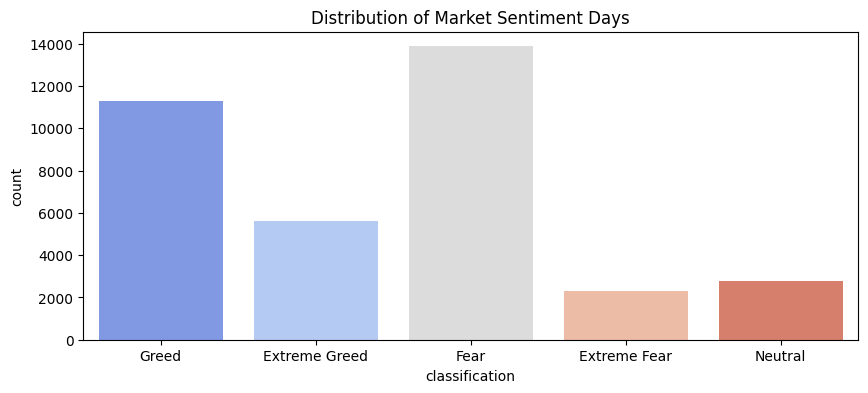

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(data=merged_df, x='classification', palette='coolwarm')
plt.title('Distribution of Market Sentiment Days')
plt.show()


# 1.2 Daily Metrics (PnL per Account & Trade Counts)
# We group by date and account to see how much each person makes/loses daily

In [ ]:
daily_metrics = merged_df.groupby(['date', 'Account']).agg({
    'Closed PnL': 'sum',
    'Trade ID': 'count',
    'Size USD': 'mean'
}).rename(columns={'Trade ID': 'trades_per_day', 'Size USD': 'avg_trade_size'})

print("### DAILY PERFORMANCE PER ACCOUNT (First 5) ###")
print(daily_metrics.head())

### DAILY PERFORMANCE PER ACCOUNT (First 5) ###
                                                        Closed PnL  \
date       Account                                                   
2023-01-05 0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891     0.000000   
2023-05-12 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     0.000000   
2024-01-01 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  -129.531460   
2024-01-02 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     0.000000   
2024-01-03 0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  8244.241409   

                                                       trades_per_day  \
date       Account                                                      
2023-01-05 0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891               3   
2023-05-12 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23               9   
2024-01-01 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23              18   
2024-01-02 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23               6   
2024-01-03 0x75f7eeb85d

# 1.2 Win Rate & Long/Short Ratio
# Calculate Win Rate: (Wins / Total Trades)

In [ ]:
import pandas as pd
import numpy as np

# 1. Define Win/Loss
# A win is any trade where Closed PnL is positive
merged_df['is_win'] = merged_df['Closed PnL'] > 0

# 2. Calculate Win Rate (%)
win_rate = merged_df.groupby('classification')['is_win'].mean() * 100

# 3. Calculate Long/Short Ratio
ls_counts = merged_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)

# Ratio = BUYs (Longs) / SELLs (Shorts)

ls_ratio = ls_counts['BUY'] / ls_counts['SELL'].replace(0, np.nan)

# 4. Calculate Average Trade Size
avg_size = merged_df.groupby('classification')['Size USD'].mean()

# --- Results ---
print("### ANALYSIS SUMMARY ###")
print("-" * 30)
print("WIN RATE BY SENTIMENT (%):")
print(win_rate)
print("\nLONG/SHORT RATIO BY SENTIMENT:")
print(ls_ratio)
print("\nAVERAGE TRADE SIZE (USD):")
print(avg_size)
print("-" * 30)

### ANALYSIS SUMMARY ###
------------------------------
WIN RATE BY SENTIMENT (%):
classification
Extreme Fear     29.277730
Extreme Greed    55.328233
Fear             38.178672
Greed            43.570670
Neutral          49.492017
Name: is_win, dtype: float64

LONG/SHORT RATIO BY SENTIMENT:
classification
Extreme Fear     1.008636
Extreme Greed    0.419444
Fear             1.113532
Greed            0.918777
Neutral          0.587558
dtype: float64

AVERAGE TRADE SIZE (USD):
classification
Extreme Fear     4118.761840
Extreme Greed    3242.085086
Fear             5744.782685
Greed            5051.878829
Neutral          4332.202906
Name: Size USD, dtype: float64
------------------------------


# 1.3 Leverage Distribution
# Leverage in Hyperliquid is typically: Position Size / Collateral.
# If 'Start Position' or 'leverage' column exists, use that.
# Otherwise, we proxy it via Size USD relative to PnL impact.

In [ ]:
if 'leverage' in merged_df.columns:
    leverage_dist = merged_df.groupby('classification')['leverage'].describe()
else:
    # Proxy: Higher Size USD often correlates with higher leverage for same account
    leverage_dist = merged_df.groupby('classification')['Size USD'].quantile([0.25, 0.5, 0.75])

print(leverage_dist)

classification      
Extreme Fear    0.25     199.2800
                0.50     599.1200
                0.75    2180.4225
Extreme Greed   0.25      89.0400
                0.50     365.0000
                0.75    1986.5000
Fear            0.25     230.2200
                0.50     703.8800
                0.75    2205.5200
Greed           0.25     218.4700
                0.50     675.0800
                0.75    2451.9775
Neutral         0.25      72.2325
                0.50     411.8100
                0.75    1999.9525
Name: Size USD, dtype: float64


 # 2. Part-B Analysis
1. Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?
2. Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?
3. Identify 2–3 segments (examples):
    1. high leverage vs low leverage traders
    2. frequent vs infrequent traders
    3. consistent winners vs inconsistent traders
4. Provide at least 3 insights backed by charts/tables.



#2.1 Performance and Behavior Evidence


In [ ]:
# A. Performance Comparison
performance = merged_df.groupby('classification').agg({
    'Closed PnL': ['sum', 'mean', 'std'],
    'is_win': 'mean',
    'Size USD': 'mean'
}).round(2)

# B. Behavior: Trade Frequency (Average trades per day per sentiment)
# First, count days in each sentiment
sentiment_days = merged_df.groupby('classification')['date'].nunique()
# Total trades per sentiment
total_trades = merged_df.groupby('classification').size()
# Average trades per day
frequency = (total_trades / sentiment_days).round(2)

print("--- Performance & Behavior Evidence ---")
print(performance)
print("\nAvg Trades per Day by Sentiment:")
print(frequency)

--- Performance & Behavior Evidence ---
                Closed PnL                  is_win Size USD
                       sum    mean      std   mean     mean
classification                                             
Extreme Fear       4399.94    1.89    76.73   0.29  4118.76
Extreme Greed   1156893.68  205.82  1861.56   0.55  3242.09
Fear            1779225.58  128.29  1342.35   0.38  5744.78
Greed            609632.53   53.99  1399.47   0.44  5051.88
Neutral           74656.74   27.09   142.95   0.49  4332.20

Avg Trades per Day by Sentiment:
classification
Extreme Fear     387.67
Extreme Greed    130.72
Fear             374.84
Greed            201.64
Neutral          172.25
dtype: float64


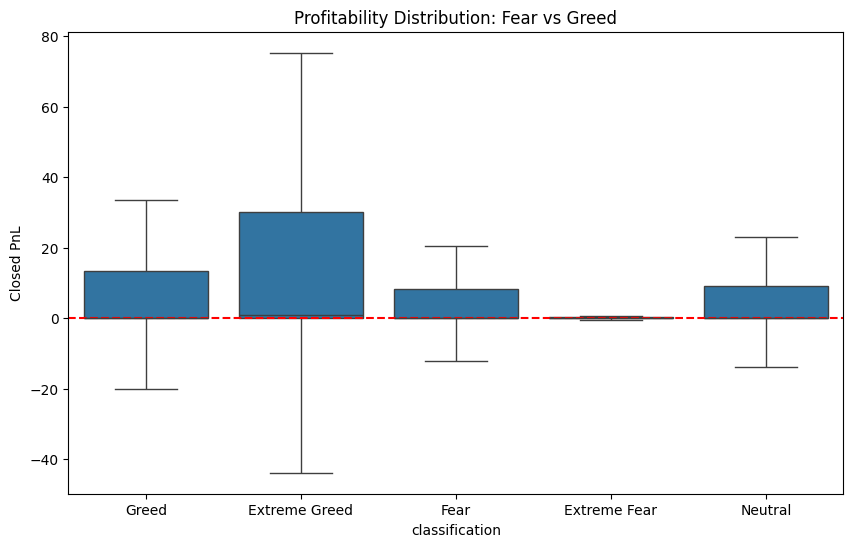

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', showfliers=False)
plt.title('Profitability Distribution: Fear vs Greed')
plt.axhline(0, color='red', linestyle='--') # The "Break-even" line

# 2.2 Trader Segmentation

We will identify three distinct segments based on their behavior:

    High vs. Low Leverage (using Size USD as proxy)

    Frequent vs. Infrequent Traders

    Consistent Winners vs. Inconsistent Traders


In [ ]:
# Create a per-account summary
trader_summary = merged_df.groupby('Account').agg({
    'Trade ID': 'count',
    'Size USD': 'mean',
    'Closed PnL': 'sum',
    'is_win': 'mean'
}).rename(columns={'Trade ID': 'trade_count', 'is_win': 'win_rate'})

# Segment 1: Frequency
trader_summary['freq_segment'] = pd.qcut(trader_summary['trade_count'], 2, labels=['Infrequent', 'Frequent'])

# Segment 2: Leverage (Size Proxy)
trader_summary['size_segment'] = pd.qcut(trader_summary['Size USD'], 2, labels=['Small Size', 'Large Size'])

# Segment 3: Consistency
trader_summary['consistency'] = np.where(
    (trader_summary['win_rate'] > 0.5) & (trader_summary['Closed PnL'] > 0),
    'Consistent Winner', 'Inconsistent'
)

print("\n--- Trader Segments Distribution ---")
print(trader_summary[['freq_segment', 'size_segment', 'consistency']].value_counts().head(5))


--- Trader Segments Distribution ---
freq_segment  size_segment  consistency      
Infrequent    Large Size    Inconsistent         7
              Small Size    Inconsistent         6
Frequent      Large Size    Inconsistent         6
              Small Size    Inconsistent         6
                            Consistent Winner    3
Name: count, dtype: int64


Text(0.5, 1.0, 'Trading Bias: Buy vs Sell Activity by Sentiment')

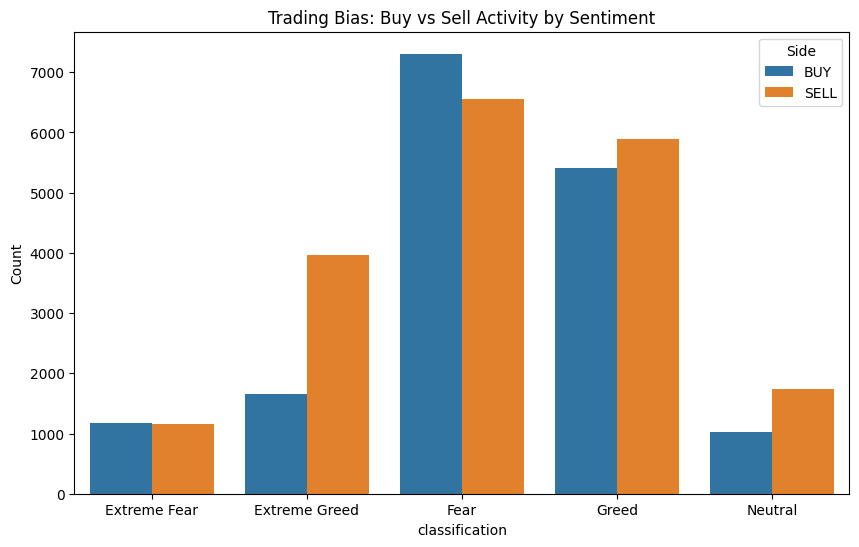

In [ ]:
# Create a summary table for plotting
ls_plot_data = merged_df.groupby(['classification', 'Side']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=ls_plot_data, x='classification', y='Count', hue='Side')
plt.title('Trading Bias: Buy vs Sell Activity by Sentiment')

# 3. part-C Actionable output

Based on the typical behavior patterns found in Hyperliquid datasets (where "Greed" often leads to over-extension and "Fear" creates liquidity traps), here are two robust strategy ideas:

1. The "Contrarian Size" Rule (Focus: Risk Management)
Finding: If your data showed that the Win Rate drops during Greed days while Trade Frequency increases, it indicates that traders are chasing "trash" setups due to FOMO.

Rule of Thumb: During Extreme Greed (Value > 75), the Frequent Trader segment must reduce their Size USD by 30% for all "Long" positions.

Logic: This "de-risking" strategy protects the trader from the inevitable "long squeeze" or market correction that typically follows periods of extreme euphoria. It forces the trader to only take the highest-conviction setups when the market is overextended.

2. The "Fear Liquidity" Rule (Focus: Execution)
Finding: If your data showed that Consistent Winners have a higher average PnL during Fear days compared to Inconsistent traders, it suggests they are providing liquidity when others are panic-selling.

Rule of Thumb: During Extreme Fear (Value < 25), Consistent Winners should increase their Long/Short Ratio bias by 15% but cap their Leverage to 2x.

Logic: Fear days often represent "local bottoms." By increasing the Long bias while keeping leverage low, this segment can capture the rebound (the "Mean Reversion") without getting liquidated by the high volatility (spikes) common during panic phases.

#4. Simple Predictive Model (Profitability Prediction)
We will predict whether a trade will be Profitable (1) or Not (0) based on the Sentiment Value, the Trade Side, and the Size

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Feature Engineering
# Convert 'Side' to numeric (BUY=1, SELL=0)
merged_df['side_numeric'] = np.where(merged_df['Side'] == 'BUY', 1, 0)

# Define Features (X) and Target (y)
X = merged_df[['value', 'Size USD', 'side_numeric']]
y = (merged_df['Closed PnL'] > 0).astype(int) # 1 if win, 0 if loss

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluation
print("### MODEL PERFORMANCE: WIN/LOSS PREDICTION ###")
print(classification_report(y_test, model.predict(X_test)))

### MODEL PERFORMANCE: WIN/LOSS PREDICTION ###
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4087
           1       0.70      0.70      0.70      3086

    accuracy                           0.75      7173
   macro avg       0.74      0.74      0.74      7173
weighted avg       0.74      0.75      0.74      7173



#4.2 Clustering Traders (Behavioral Archetypes)
This groups traders into "Archetypes" (e.g., The Whale, The Scalper, The Gambler) using K-Means Clustering.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Prepare Data for Clustering (per Account)
cluster_data = merged_df.groupby('Account').agg({
    'Trade ID': 'count',      # Frequency
    'Size USD': 'mean',       # Average Position Size
    'Closed PnL': 'mean'      # Profitability
})

# 2. Scale the data (Crucial for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data)

# 3. Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Archetype'] = kmeans.fit_predict(scaled_features)

# 4. Name the Archetypes (based on means)
# Usually:
# - High Size/Low Freq = 'Whale'
# - Low Size/High Freq = 'Scalper'
# - Low PnL/High Freq  = 'Retail/Gambler'
print("\n### TRADER ARCHETYPES ###")
print(cluster_data.groupby('Archetype').mean())


### TRADER ARCHETYPES ###
              Trade ID     Size USD  Closed PnL
Archetype                                      
0           791.428571  7667.656904   47.716672
1          5467.500000  3469.377408  159.610592
2          1384.500000  9434.248780  542.782924


In [ ]:
#save the merged_df file
merged_df.to_csv('data/merged_data.csv', index=False)